In [1]:
import numpy as np
import scipy.special as sc
import os

In [30]:
alphap = 1

dir_data_alpha3 = "../data/alpha3/"
dir_fig = "../figures/alpha{}".format(alphap)
fig_name = dir_fig + "phi_plot_{}.pdf".format(alphap)

In [31]:
n_star = np.linspace(0,1,1_000_001)

# def func_trans(n_star,alpha,p):
#     """left-hand side of transcendental equation defined as a numpy array"""
#     return (sc.gamma(n_star+alpha)*sc.gamma(2*alpha))/(sc.gamma(n_star+2*alpha)*sc.gamma(alpha))-1/(1+p)

In [32]:
# def find_df(alpha,p):
#     """root finding by minimizing the cost function: square of left-hanad side"""
#     cost_array = func_trans(n_star,alpha,p)**2
#     min_index = np.argmin(cost_array)
#     df_value = n_star[min_index]
#     df_rounded = float("{:.6f}".format(df_value))
#     return df_rounded

In [33]:
%run ../stochastic_fractal_m.py
find_df = df_determination.find_df

In [34]:
def phi_list(alpha,p):
    xi_list = np.linspace(0,2,10_001)
    df = find_df(alpha,p)
    
    if alpha == 1:
        xi_list = np.linspace(0,10,10_001)
        density = xi_list*np.exp(-xi_list)
        return xi_list, density
    
    elif alpha == 2:
        c2 = -(sc.gamma(1/3)/sc.gamma(5/3))*(sc.gamma((df+5)/3)/sc.gamma((df+3)/3))
        density1 = -3*(df+2)*(xi_list**2)*sc.hyp1f1(-(df-1)/3, 4/3, -xi_list**3)
        density2 = -(3/5)*c2*df*(xi_list**4)*sc.hyp1f1(-(df-3)/3, 8/3, -xi_list**3)
        density3 = -2*c2*(xi_list)*sc.hyp1f1(-df/3, 5/3, -xi_list**3)
        density = density1 + density2+ density3
        return xi_list, density
    
    elif alpha == 3:
        
        if abs(p-0.1) <= 1e-6:
            filename = 'phi_0_10_list.csv'
            
        elif abs(p-0.5) <= 1e-6:
            filename = 'phi_0_50_list.csv'

        elif abs(p-0.9) <= 1e-6:
            filename = 'phi_0_90_list.csv'
            
        elif abs(p-0.75) <= 1e-6:
            filename = 'phi_0_75_list.csv'
            
        else:
            print('analytical plot available only for p-values 0.10, 0.50, 0.75 and 0.90')
            return None
            
        density = np.loadtxt(dir_data_alpha3 + filename)
        if density.shape[0]!=xi_list.shape[0]:
            print('density.shape[0]!=xi_list.shape[0]')
        return xi_list, density
            
    else:
        print('the analytical solution for alpha = {} value is unknown'.format(alpha))

../figures/alpha1phi_plot_1.pdf


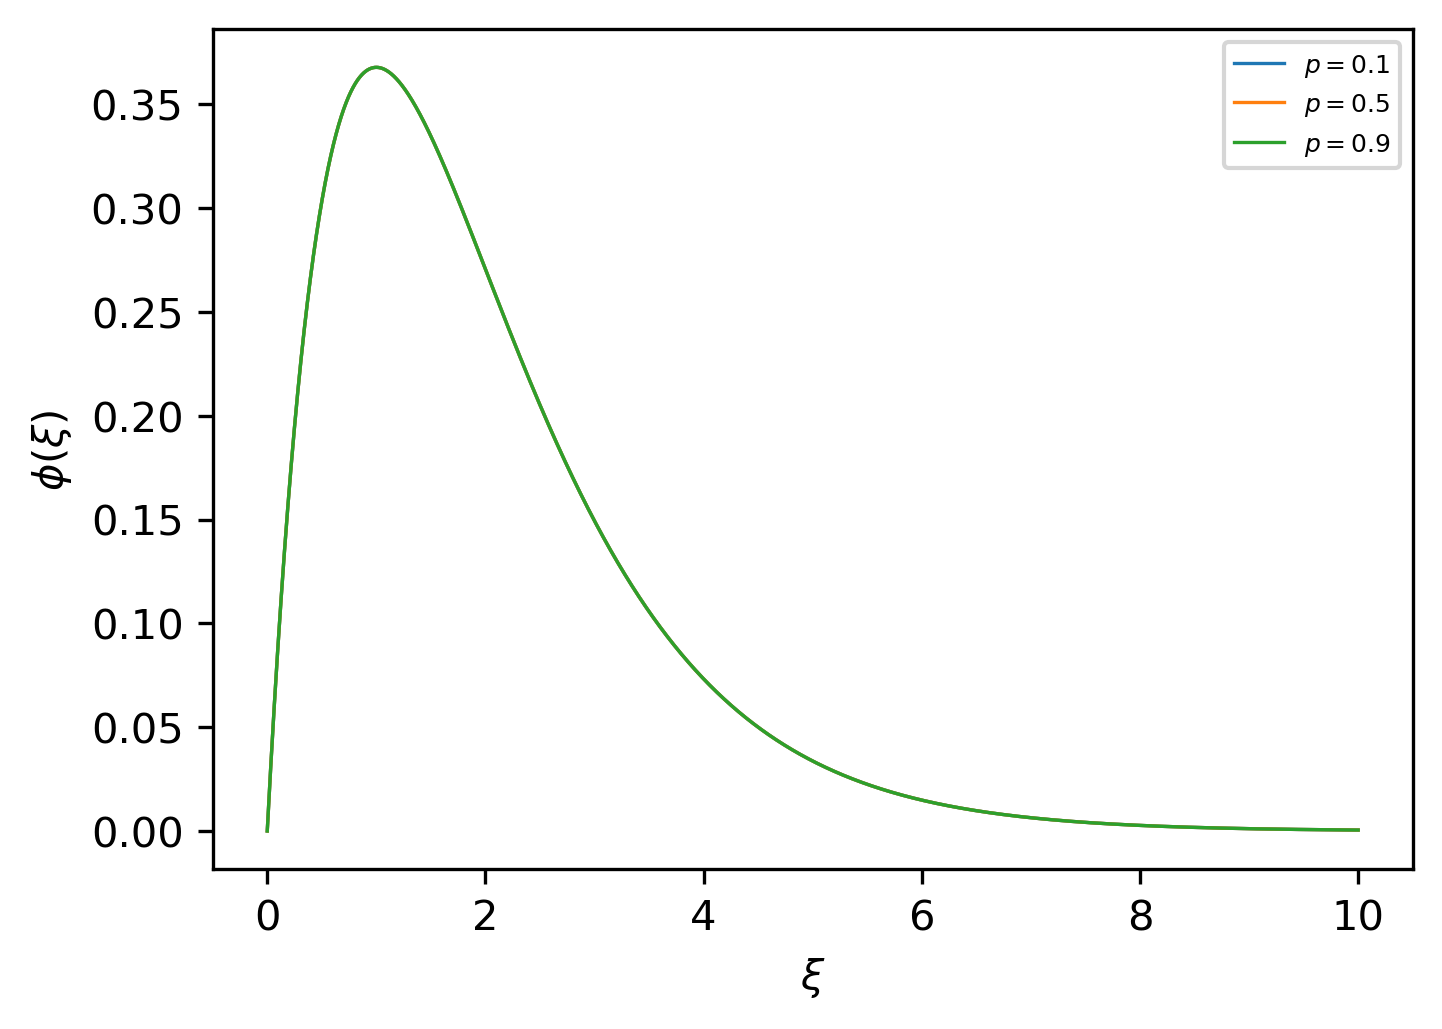

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), dpi=300)
p_values = [0.1, 0.5, 0.9]

for p in p_values:
    x,y = phi_list(alphap,p)
    #plt.plot(x, y)
    plt.plot(x, y, label=r"$p={:.1f}$".format(p), linewidth=0.8)
    pass

plt.legend(fontsize=6, loc=1)
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\phi(\xi)$")
ax.set_position([0.15, 0.15, 0.8, 0.8])
print(fig_name)
# plt.savefig(fig_name)